# Chapter 01: Getting Started with Time Series

## Get access to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
!pwd

/content


In [5]:
!cd "drive/MyDrive/Colab Notebooks"

## Loading a time series using pandas

In [3]:
!ls

drive  sample_data


In [ ]:
import pandas as pd

data = pd.read_csv('../assets/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']
series

Datetime
2007-10-01 00:00:00    0.0
2007-10-01 01:00:00    0.0
2007-10-01 02:00:00    0.0
2007-10-01 03:00:00    0.0
2007-10-01 04:00:00    0.0
                      ... 
2013-09-30 19:00:00    0.0
2013-09-30 20:00:00    0.0
2013-09-30 21:00:00    0.0
2013-09-30 22:00:00    0.0
2013-09-30 23:00:00    0.0
Name: Incoming Solar, Length: 52608, dtype: float64

## Visualizing a time series

/Users/fernando/miniconda3/envs/MLMIC25fc/lib/python3.10/site-packages/seaborn/_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)


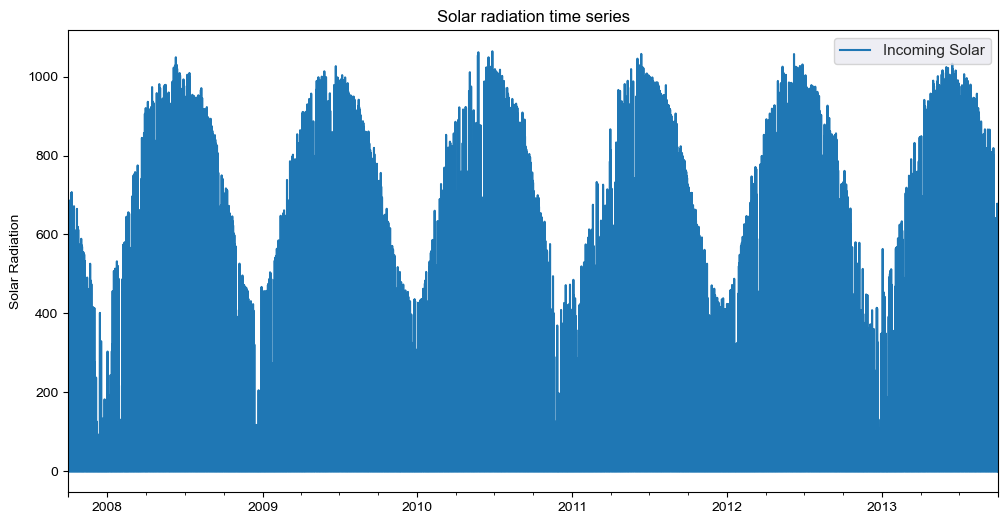

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../assets/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']

series.plot(figsize=(12, 6), title='Solar radiation time series')

series_df = series.reset_index()

plt.rcParams['figure.figsize'] = [12, 6]
sns.set_theme(style='darkgrid')

sns.lineplot(x='Datetime',
             y='Incoming Solar',
             data=series_df)

plt.ylabel('Solar Radiation')
plt.xlabel('')
plt.title('Solar radiation time series')
plt.show()

plt.savefig('../assets/time_series_plot.png')


## Resampling a time series

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

n_sales = 1000
start = pd.Timestamp('2023-01-01 09:00')
end = pd.Timestamp('2023-04-01')
n_days = (end - start).days + 1

irregular_series = pd.to_timedelta(np.random.rand(n_sales) * n_days,
                                   unit='D') + start

print(pd.Series(irregular_series.sort_values()[:6]).reset_index())



   index                             0
0      0 2023-01-01 12:09:54.955714766
1      1 2023-01-01 14:15:33.058706212
2      2 2023-01-01 14:27:47.350677934
3      3 2023-01-01 14:36:49.445894790
4      4 2023-01-01 16:01:16.333860141
5      5 2023-01-01 17:01:17.577348755


[Text(0.5, 1.0, 'Daily sales count')]

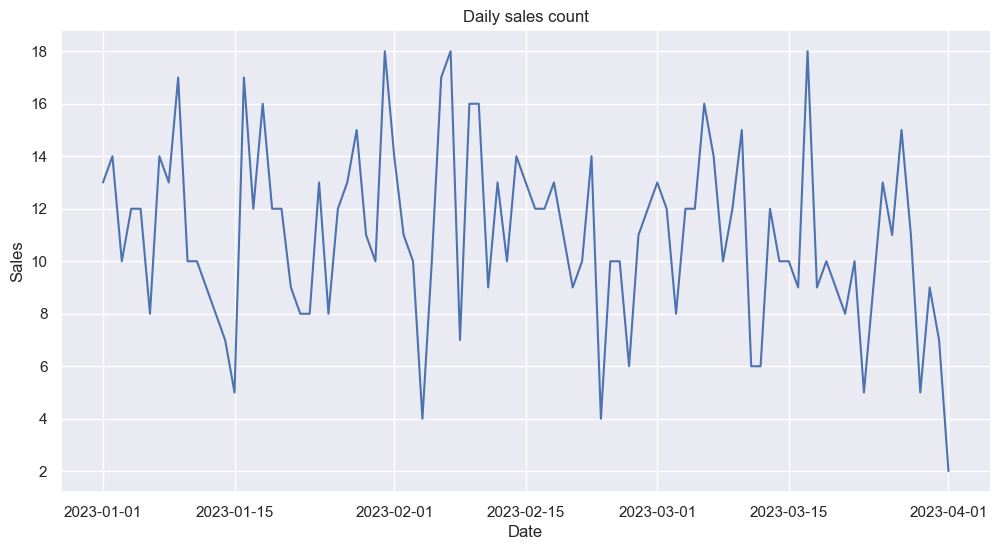

In [ ]:
series_sales = pd.Series(0, index=irregular_series).resample('D').count()
series_sales.name = 'Sales'
series_sales.index.name = 'Date'

sns.lineplot(x='Date',
             y='Sales',
             data=series_sales.reset_index()). \
    set(title='Daily sales count')


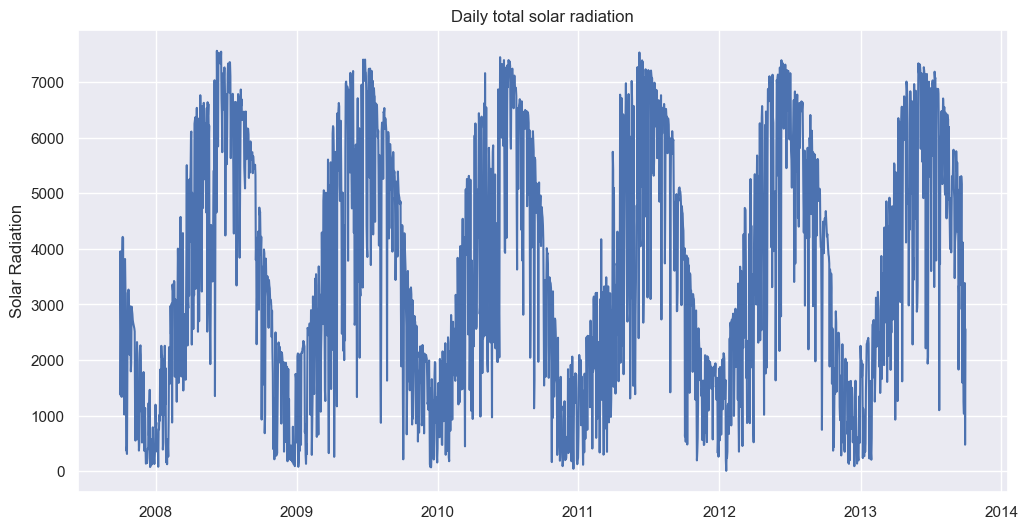

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../assets/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']

series_daily = series.resample('D').sum()

series_df = series_daily.reset_index()

plt.rcParams['figure.figsize'] = [12, 6]

sns.set_theme(style='darkgrid')

sns.lineplot(x='Datetime',
             y='Incoming Solar',
             data=series_df)

plt.ylabel('Solar Radiation')
plt.xlabel('')
plt.title('Daily total solar radiation')
plt.show()

plt.savefig('../assets/daily_time_series_plot.png')


## Dealing with missing values

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../assets/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar'].resample('D').sum()

sample_with_nan = series.head(365 * 2).copy()

size_na = int(0.6 * len(sample_with_nan))

idx = np.random.choice(a=range(len(sample_with_nan)),
                       size=size_na,
                       replace=False)

sample_with_nan[idx] = np.nan

# imputation with mean value
avg_value = sample_with_nan.mean()
imp_mean = sample_with_nan.fillna(avg_value)
# imputation with last known observation
imp_ffill = sample_with_nan.ffill()
# imputation with next known observation
imp_bfill = sample_with_nan.bfill()


/var/folders/v_/pl7__6kj0nx_lfsnm4_g91q80000gn/T/ipykernel_95614/1129051240.py:20: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sample_with_nan[idx] = np.nan


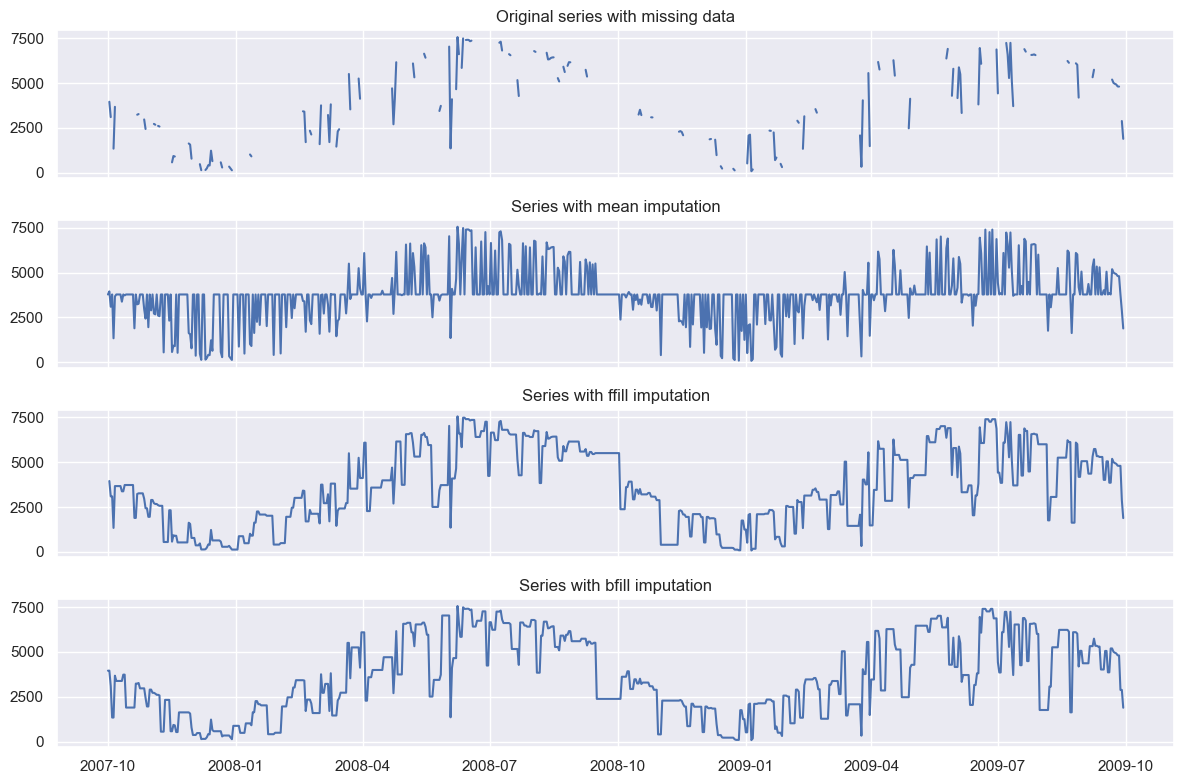

In [ ]:

plt.rcParams['figure.figsize'] = [12, 8]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, sharex=True)
# fig.suptitle('Time series imputation methods')

ax0.plot(sample_with_nan)
ax0.set_title('Original series with missing data')
ax1.plot(imp_mean)
ax1.set_title('Series with mean imputation')
ax2.plot(imp_ffill)
ax2.set_title('Series with ffill imputation')
ax3.plot(imp_bfill)
ax3.set_title('Series with bfill imputation')

plt.tight_layout()

plt.savefig('../assets/missing_data_plot.png')


## Decomposing a time series

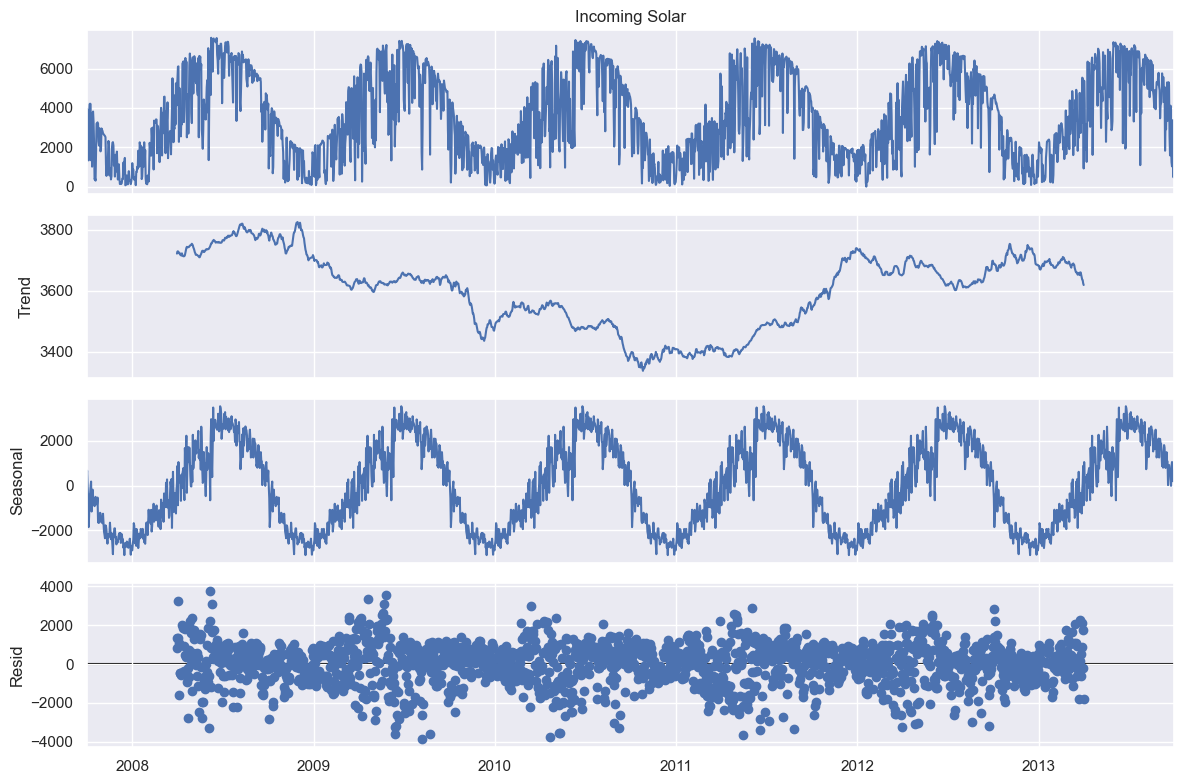

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv('../assets/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']

series_daily = series.resample('D').sum()

result = seasonal_decompose(x=series_daily,
                            model='additive',
                            period=365)

plot = result.plot()

plot.savefig('../assets/classical_decomposition.png')


In [ ]:
result.seasonal


Datetime
2007-10-01     311.609110
2007-10-02     667.133275
2007-10-03     -28.737136
2007-10-04    -559.957574
2007-10-05   -1854.845684
                 ...     
2013-09-26    1051.446261
2013-09-27     654.280508
2013-09-28     192.685658
2013-09-29     311.609110
2013-09-30     667.133275
Freq: D, Name: seasonal, Length: 2192, dtype: float64

In [ ]:
result.trend

Datetime
2007-10-01   NaN
2007-10-02   NaN
2007-10-03   NaN
2007-10-04   NaN
2007-10-05   NaN
              ..
2013-09-26   NaN
2013-09-27   NaN
2013-09-28   NaN
2013-09-29   NaN
2013-09-30   NaN
Freq: D, Name: trend, Length: 2192, dtype: float64

In [ ]:
result.resid


Datetime
2007-10-01   NaN
2007-10-02   NaN
2007-10-03   NaN
2007-10-04   NaN
2007-10-05   NaN
              ..
2013-09-26   NaN
2013-09-27   NaN
2013-09-28   NaN
2013-09-29   NaN
2013-09-30   NaN
Freq: D, Name: resid, Length: 2192, dtype: float64

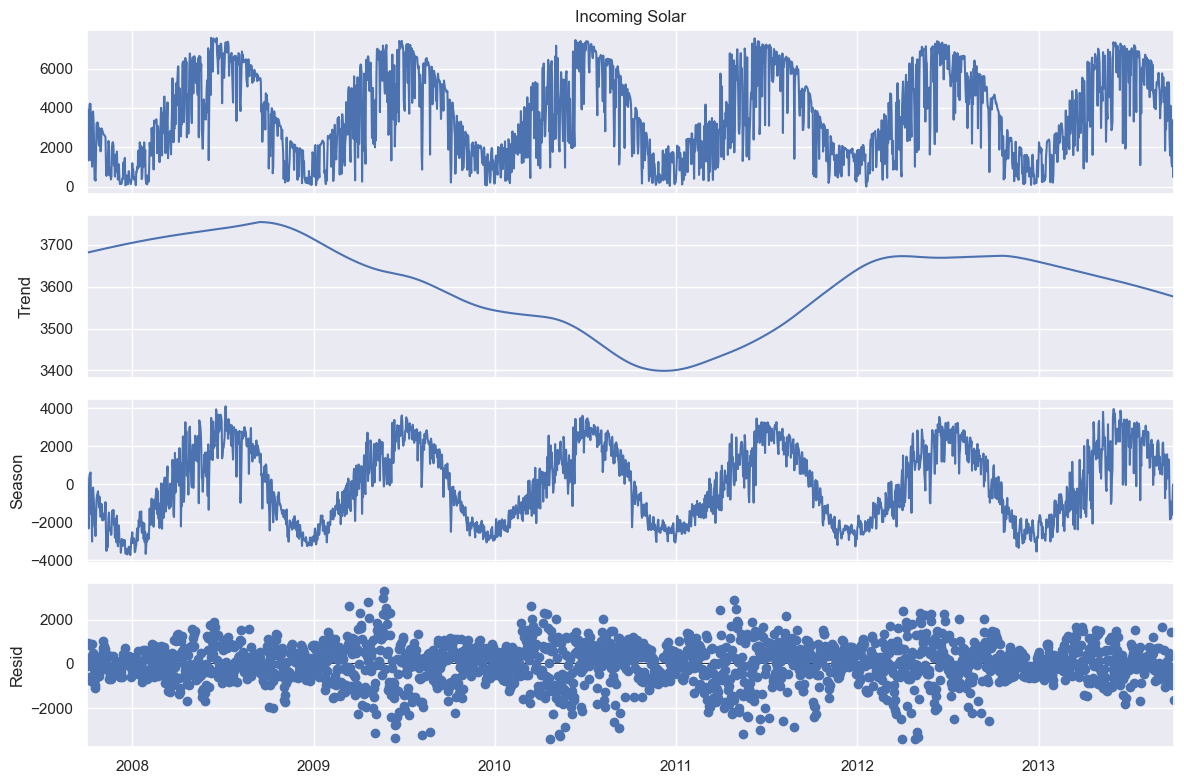

In [ ]:

# STL

from statsmodels.tsa.seasonal import STL

result = STL(endog=series_daily, period=365).fit()

plot = result.plot()



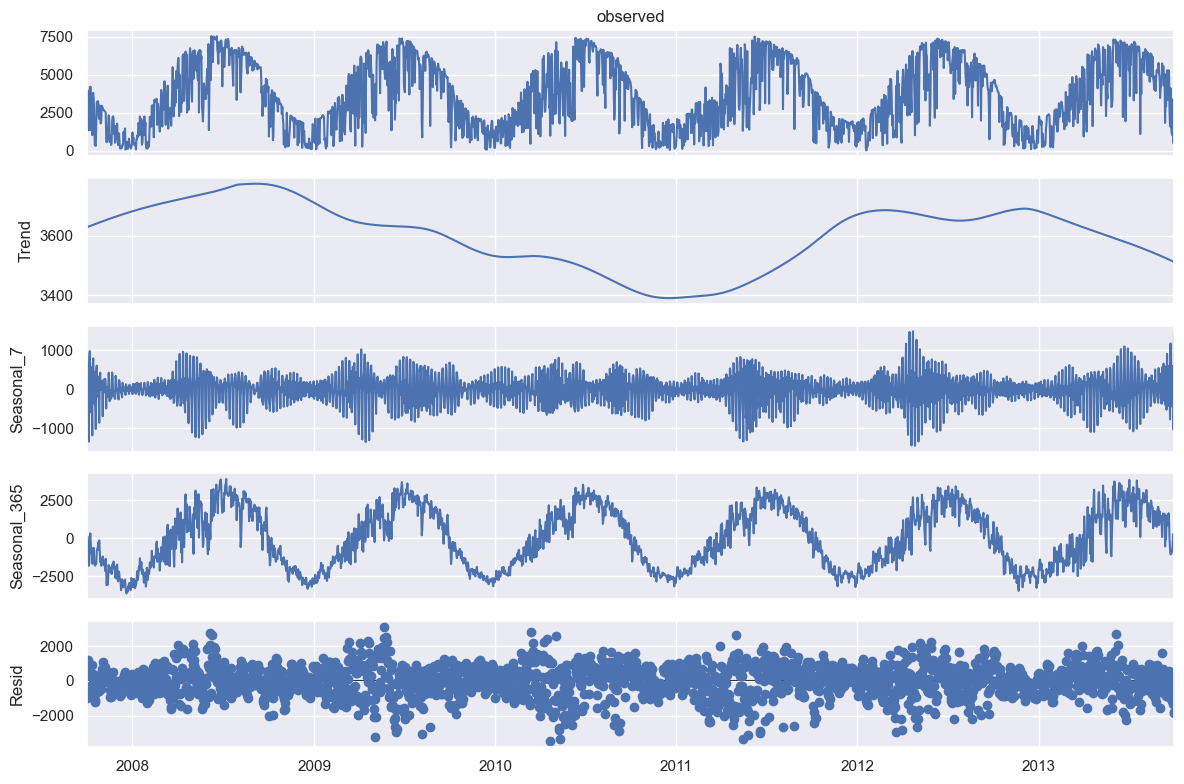

In [ ]:
# MSTL

from statsmodels.tsa.seasonal import MSTL

result = MSTL(endog=series_daily, periods=(7, 365)).fit()

plot = result.plot()


## Computing autocorrelation

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib

#matplotlib.use('TkAgg')

data = pd.read_csv('../assets/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']

series_daily = series.resample('D').sum()

acf_scores = acf(x=series_daily, nlags=365)

In [ ]:
pacf_scores = pacf(x=series_daily, nlags=365)

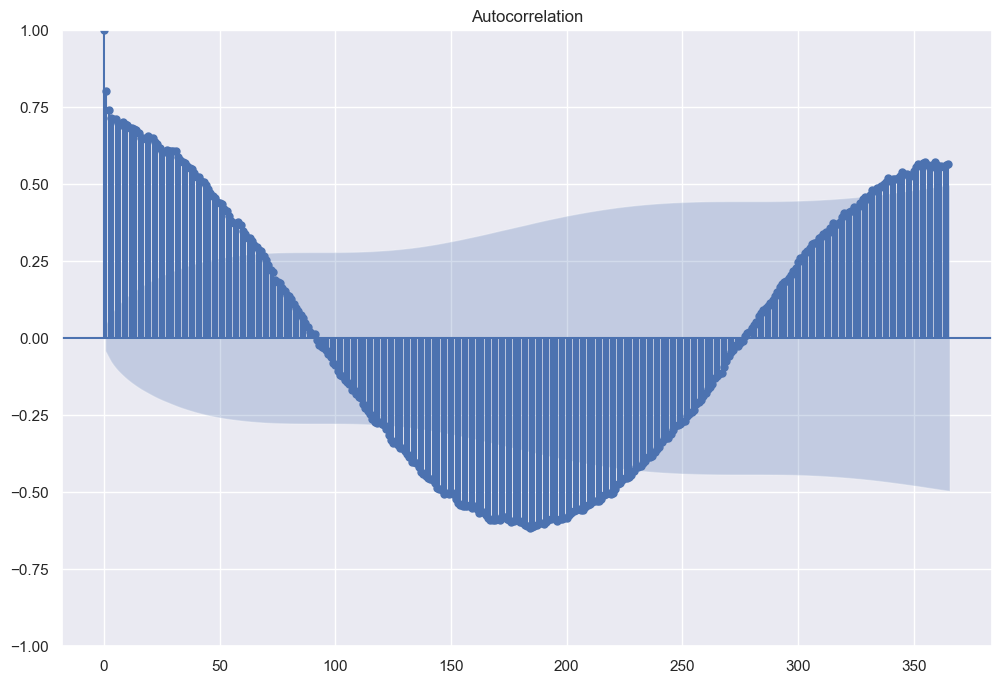

In [ ]:
acf_plot_ = plot_acf(series_daily, lags=365)

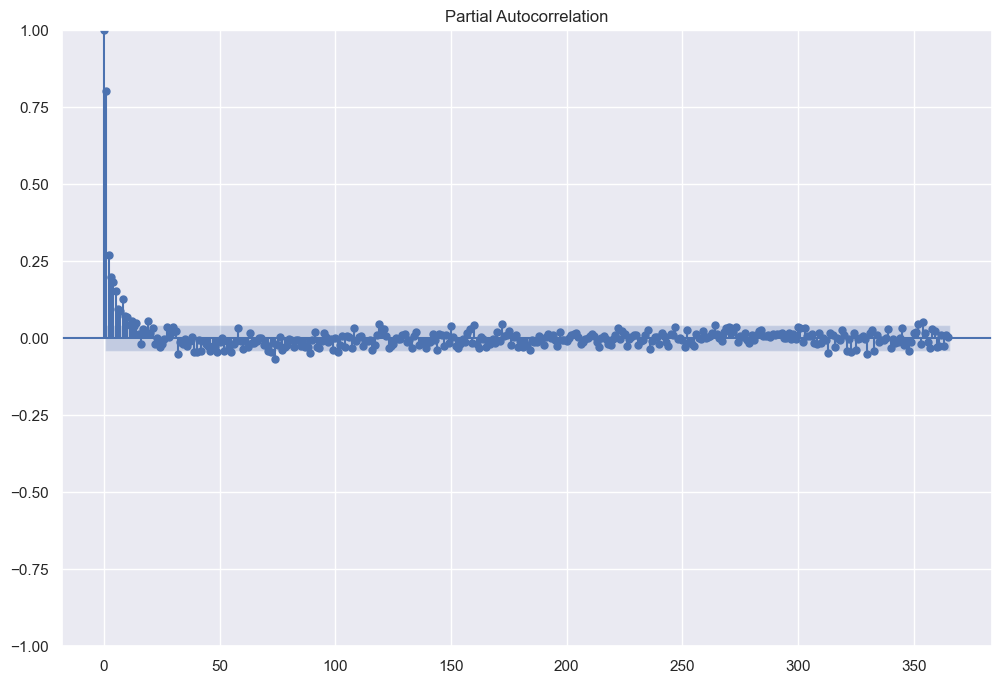

In [ ]:
pacf_plot_ = plot_pacf(series_daily, lags=365)

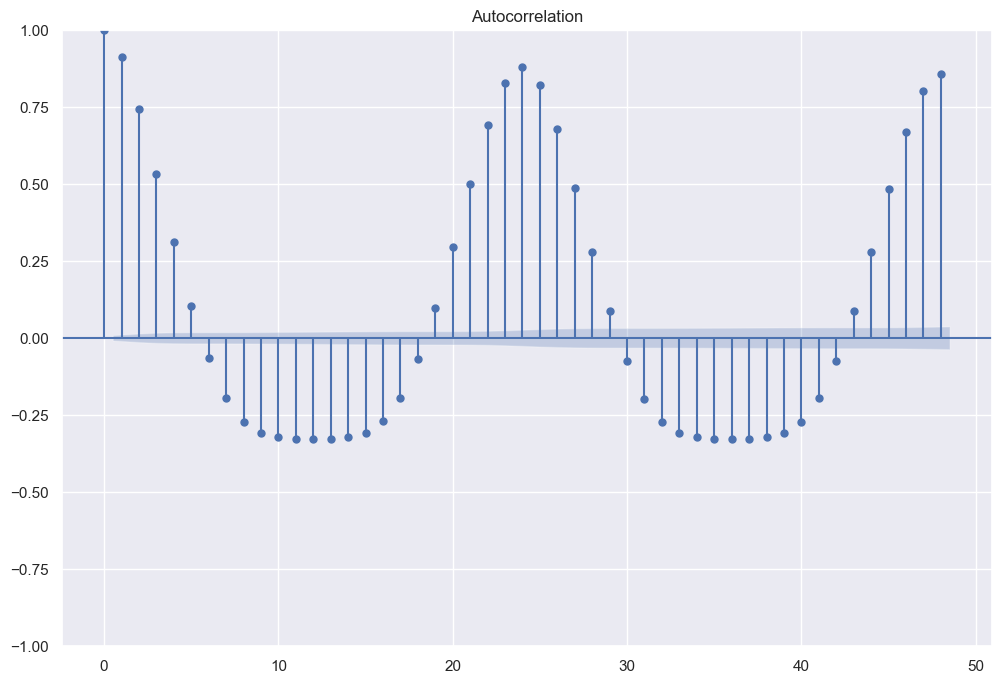

In [ ]:
plot = plot_acf(series, lags=48)

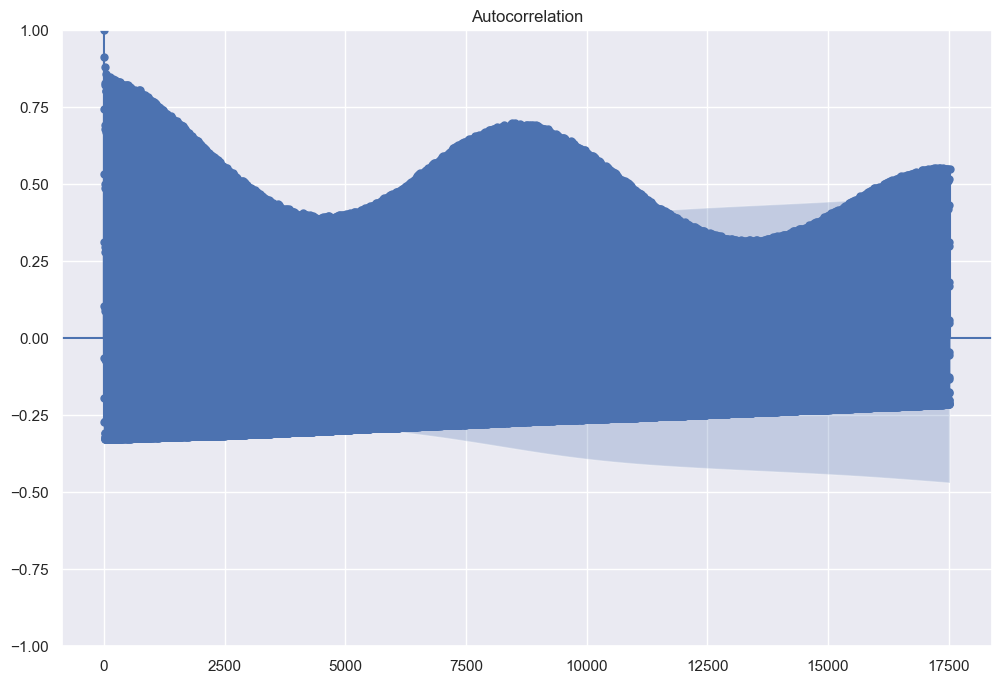

In [ ]:
plot = plot_acf(series, lags=365 * 24 * 2)

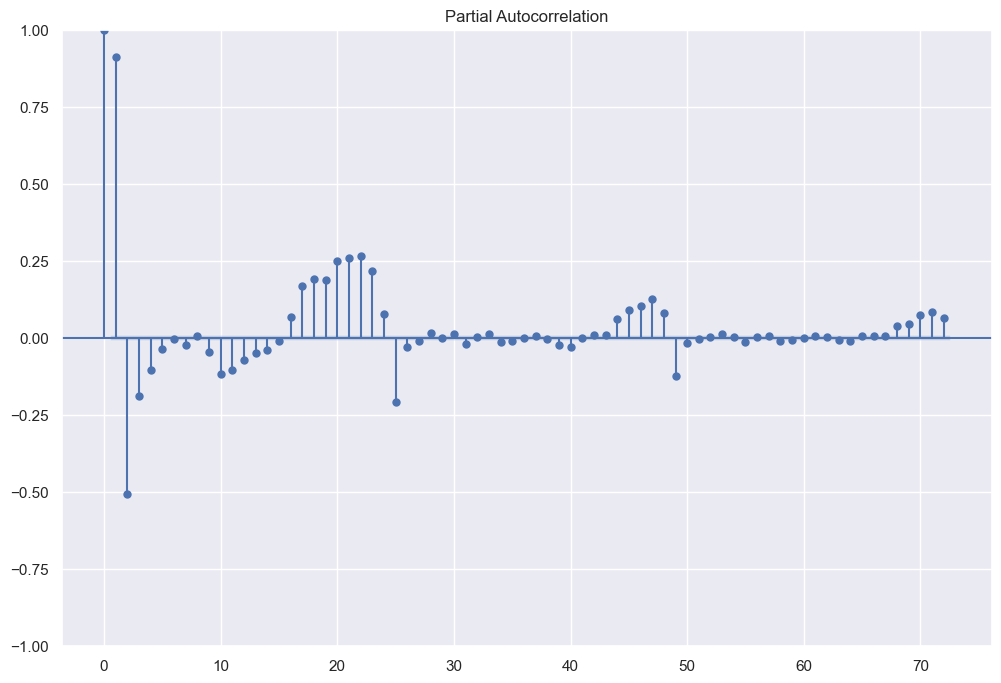

In [ ]:
plot = plot_pacf(series, lags=72)

## Detecting stationarity

In [ ]:
#!pip install --no-binary :all: --force-reinstall pmdarima

In [ ]:
import pandas as pd
from pmdarima.arima import ndiffs, nsdiffs

data = pd.read_csv('../assets/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']

series_daily = series.resample('D').sum()


In [ ]:
%%capture
ndiffs_kpss = ndiffs(x=series_daily, test='kpss')

In [ ]:
print(ndiffs_kpss)

0


In [ ]:
%%capture
ndiffs_adf = ndiffs(x=series_daily, test='adf')

In [ ]:
print(ndiffs_adf)

1


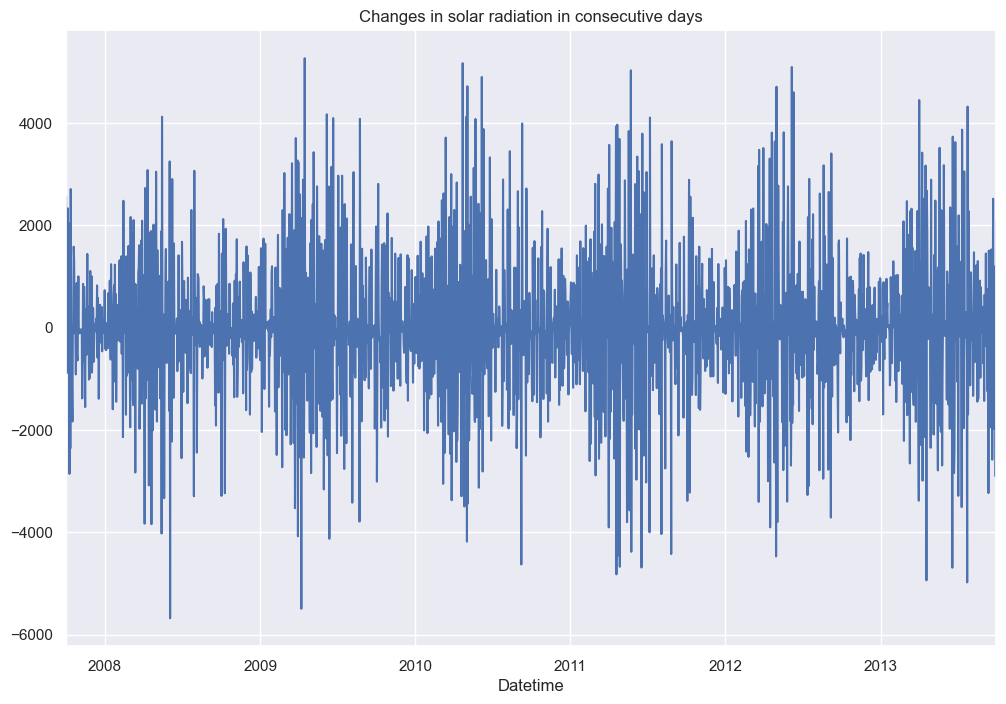

In [ ]:
series_changes = series_daily.diff()[1:]
plt = series_changes.plot(title='Changes in solar radiation in consecutive days')
plt.figure.savefig('../assets/uts_daily_changes.png')

In [ ]:
%%capture
nsdiffs_ch = nsdiffs(x=series_changes, test='ch', m=365)


In [ ]:
print(nsdiffs_ch)

2


In [ ]:
%%capture
nsdiffs_ocsb = nsdiffs(x=series_changes, test='ocsb', m=365)


In [ ]:
print(nsdiffs_ocsb)

0


## Dealing with heteroskedasticity

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from scipy import stats

data = pd.read_csv('../assets/datasets/time_series_solar.csv',
                   parse_dates=['Datetime'],
                   index_col='Datetime')

series = data['Incoming Solar']

series_daily = series.resample('D').sum()

series_df = series_daily.reset_index(drop=True).reset_index()
series_df.columns = ['time', 'value']
series_df['time'] += 1


In [ ]:

olsr = ols('value ~ time', series_df).fit()

_, pval_white, _, _ = sms.het_white(olsr.resid, olsr.model.exog)
_, pval_bp, _, _ = sms.het_breuschpagan(olsr.resid, olsr.model.exog)

print(pval_white)


0.21360455192801153


In [ ]:
print(pval_bp)

0.20630757319125953


In [ ]:
class LogTransformation:

    @staticmethod
    def transform(x):
        xt = np.sign(x) * np.log(np.abs(x) + 1)

        return xt

    @staticmethod
    def inverse_transform(xt):
        x = np.sign(xt) * (np.exp(np.abs(xt)) - 1)

        return x


series_log = LogTransformation.transform(series_daily)

series_transformed, lmbda = stats.boxcox(series_daily + 1)

series_transformed = pd.Series(series_transformed, index=series_daily.index)

## Loading and visualizing a multivariate time series

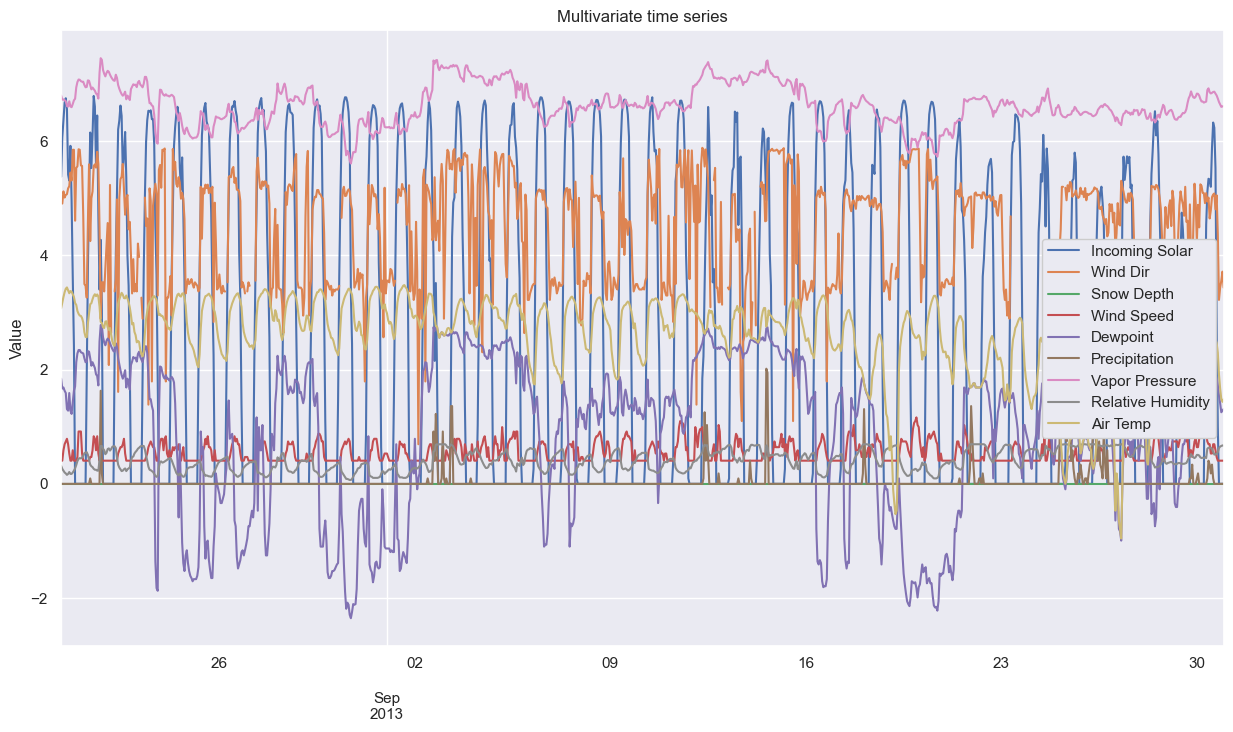

In [ ]:
import pandas as pd
import numpy as np
import matplotlib

# matplotlib.use('TkAgg')

data = pd.read_csv('../assets/datasets/time_series_smf1.csv',
                   parse_dates=['datetime'],
                   index_col='datetime')


class LogTransformation:

    @staticmethod
    def transform(x):
        xt = np.sign(x) * np.log(np.abs(x) + 1)

        return xt

    @staticmethod
    def inverse_transform(xt):
        x = np.sign(xt) * (np.exp(np.abs(xt)) - 1)

        return x


data_log = LogTransformation.transform(data)

mv_plot = data_log.tail(1000).plot(figsize=(15, 8),
                                   title='Multivariate time series',
                                   xlabel='',
                                   ylabel='Value')
mv_plot.legend(fancybox=True, framealpha=1)
mv_plot.figure.savefig('../assets/mts_plot.png')


## Resampling a multivariate time series

<Axes: xlabel='datetime'>

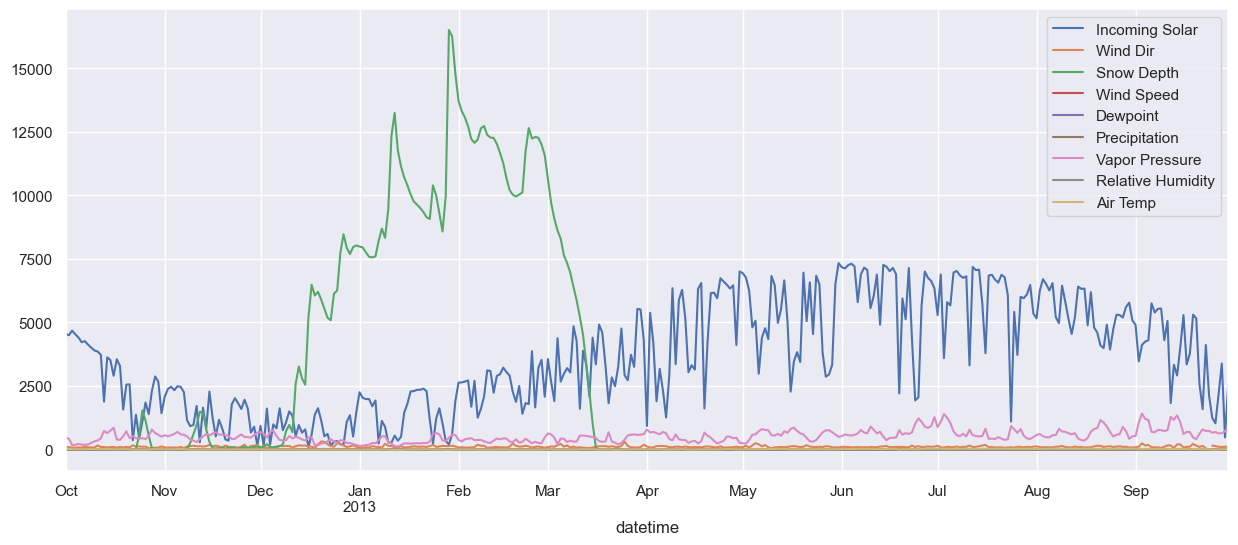

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv('../assets/datasets/time_series_smf1.csv',
                   parse_dates=['datetime'],
                   index_col='datetime')

stat_by_variable = {
    'Incoming Solar': 'sum',
    'Wind Dir': 'mean',
    'Snow Depth': 'sum',
    'Wind Speed': 'mean',
    'Dewpoint': 'mean',
    'Precipitation': 'sum',
    'Vapor Pressure': 'mean',
    'Relative Humidity': 'mean',
    'Air Temp': 'max',
}

data_daily = data.resample('D').agg(stat_by_variable)

data_daily.tail(365).plot(figsize=(15, 6))


<Axes: xlabel='datetime'>

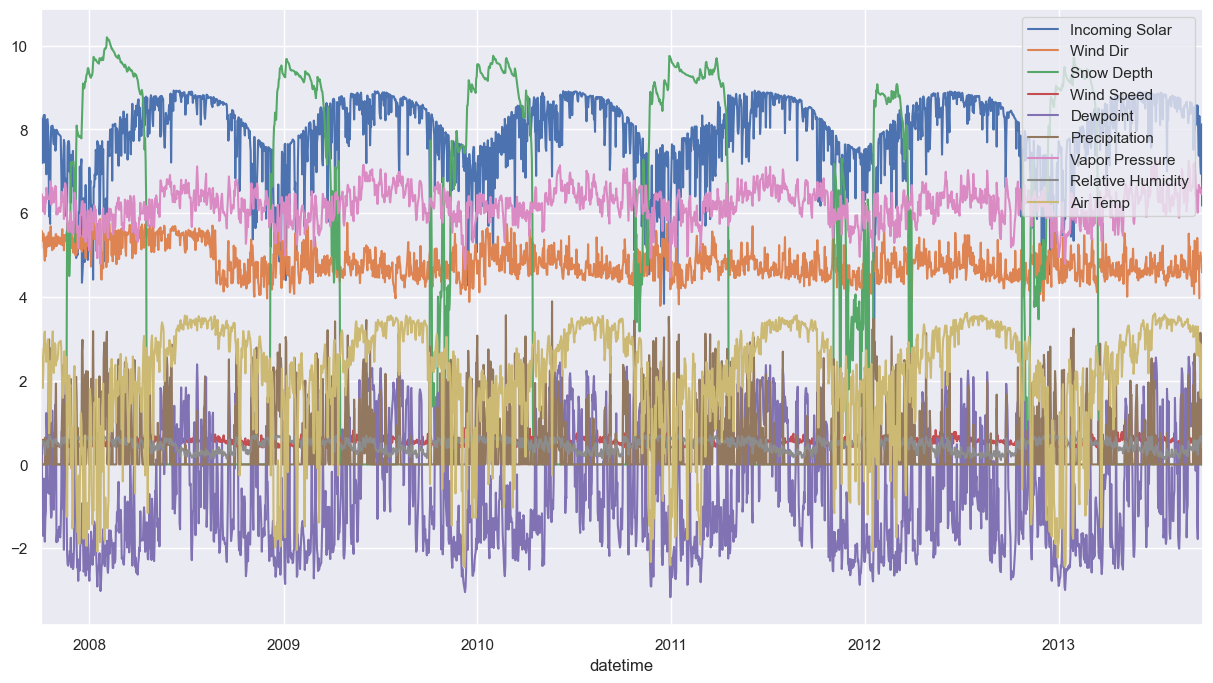

In [ ]:
data_logscale = np.sign(data_daily) * np.log(np.abs(data_daily) + 1)

data_logscale.plot(figsize=(15, 8))


<Axes: xlabel='datetime'>

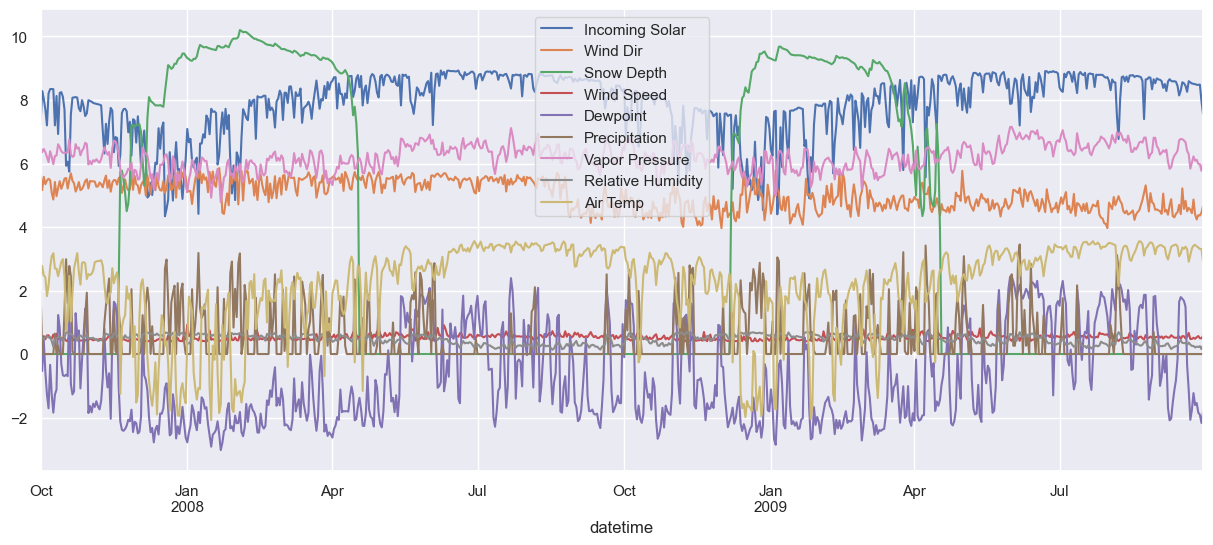

In [ ]:
data_logscale.head(365 * 2).plot(figsize=(15, 6))


## Analyzing correlation among pairs of variables

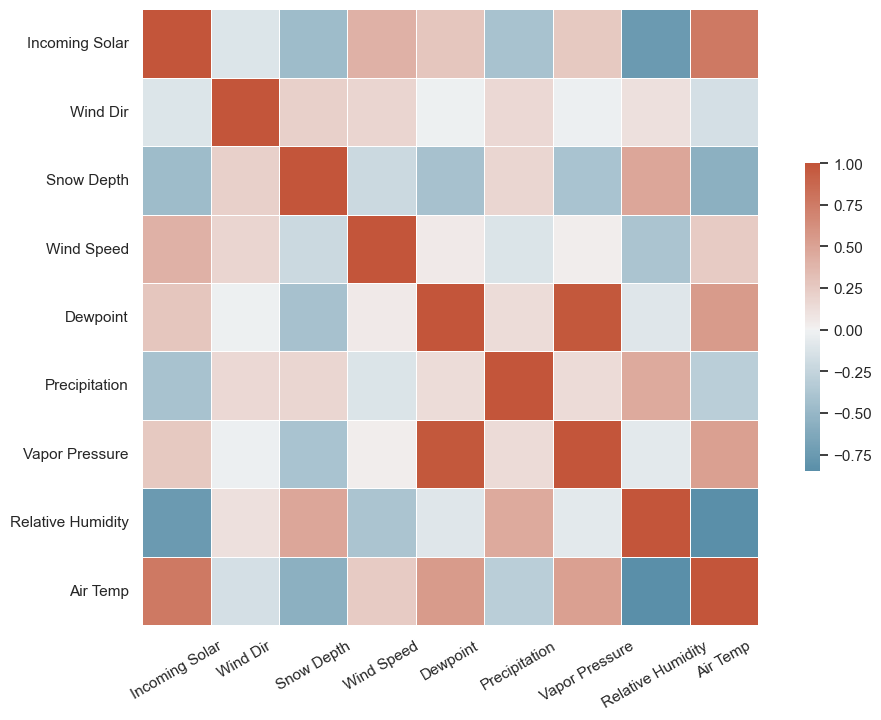

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../assets/datasets/time_series_smf1.csv',
                   parse_dates=['datetime'],
                   index_col='datetime')

stat_by_variable = {
    'Incoming Solar': 'sum',
    'Wind Dir': 'mean',
    'Snow Depth': 'sum',
    'Wind Speed': 'mean',
    'Dewpoint': 'mean',
    'Precipitation': 'sum',
    'Vapor Pressure': 'mean',
    'Relative Humidity': 'mean',
    'Air Temp': 'max',
}

data_daily = data.resample('D').agg(stat_by_variable)

# calculate the correlation matrix
corr_matrix = data_daily.corr(method='pearson')

# plot the heatmap
sns.heatmap(data=corr_matrix,
            cmap=sns.diverging_palette(230, 20, as_cmap=True),
            xticklabels=data_daily.columns,
            yticklabels=data_daily.columns,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

plt.xticks(rotation=30)

plt.savefig('../assets/corr_heatmap.png')


In [ ]:
t